In [1]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import utils
from trainer import train_svm, train_test_svm

train_data_path = 'data/train_set.csv'
test_data_path = 'data/test_set.csv'
data_split = 0.7

In [2]:
log = np.linspace(-3,3,9)
c_list = 10**log

t_acc, v_acc = [], []
max_acc, c_max = 0, None
for c in tqdm(c_list):
    train_acc, valid_acc = train_svm(train_data_path, data_split, 25, True, None, 'libsvm', c, 'linear', None, True)
    t_acc.append(train_acc)
    v_acc.append(valid_acc)
    if valid_acc > max_acc:
        max_acc, c_max = valid_acc, c

100%|██████████| 9/9 [01:33<00:00, 10.37s/it]


In [3]:
print(f'C = {c_max}')
print(f'Highest Validation Accuracy: {max_acc}')

C = 0.03162277660168379
Highest Validation Accuracy: 91.47254575707154


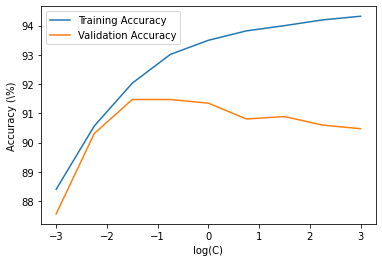

In [4]:
plt.plot(log, t_acc, label='Training Accuracy')
plt.plot(log, v_acc, label='Validation Accuracy')
plt.ylabel('Accuracy (\%)')
plt.xlabel('log(C)')
plt.legend()
plt.show()

In [5]:
c = 0.04
train_acc, valid_acc = train_svm(train_data_path, data_split, 25, True, None, 'libsvm', c, 'linear', None, False)

Training SVM
Time Taken: 0.3761260509490967s
Training Accuracy: 92.17298070050036
Validation Accuracy: 91.51414309484193


In [6]:
test_preds = train_test_svm(train_data_path, test_data_path, 25, c, 'linear', None)
utils.create_test_outputs(test_preds, 'results/res_linear.csv')

Training SVM
Time Taken: 0.5680809020996094s
Training Accuracy: 92.72500000000001
Test outputs written in results/res_linear.csv


In [7]:
gamma = np.array([1e-2, 5e-2, 1e-1, 5e-1, 1, 5, 10])
c_list = np.array([2, 4, 8, 10, 12, 14])

params = np.array(np.meshgrid(gamma, c_list)).T.reshape(-1,2)
v_acc = []
max_acc, c_max, g_max = 0, None, None
for p in tqdm(params):
    g, c = p[0], p[1]
    train_acc, valid_acc = train_svm(train_data_path, data_split, 25, True, None, 'libsvm', c, 'gaussian', g, True)
    v_acc.append(valid_acc)
    if valid_acc > max_acc:
        max_acc = valid_acc
        c_max, g_max = c, g

100%|██████████| 42/42 [03:19<00:00,  4.76s/it]


In [8]:
print(f'C = {c_max}')
print(f'\u03B3 = {g_max}')
print(f'Highest Validation Accuracy: {max_acc}')

C = 4.0
γ = 0.05
Highest Validation Accuracy: 96.71381031613977


In [9]:
test_preds = train_test_svm(train_data_path, test_data_path, 25, c_max, 'gaussian', g_max)
utils.create_test_outputs(test_preds, 'results/res_gaussian.csv')

Training SVM
Time Taken: 1.1872482299804688s
Training Accuracy: 99.97500000000001
Test outputs written in results/res_gaussian.csv
